In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
csv_file_path = 'expressions_log2.csv'
df = pd.read_csv(csv_file_path)
df.head(5)

,Timestamp,PredictedEmotion
0,1.707900e+09,Neutral
1,1.707900e+09,Neutral
2,1.707900e+09,Neutral
3,1.707900e+09,Relaxed
4,1.707900e+09,Relaxed


***********************************


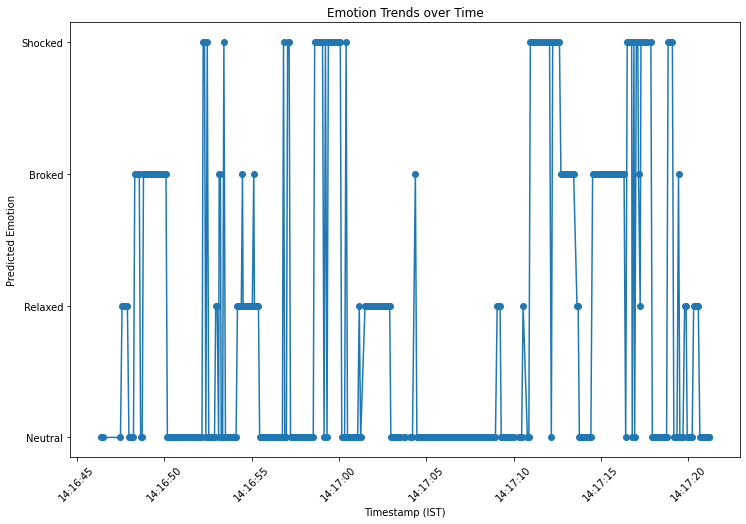

***********************************


<Figure size 864x576 with 0 Axes>

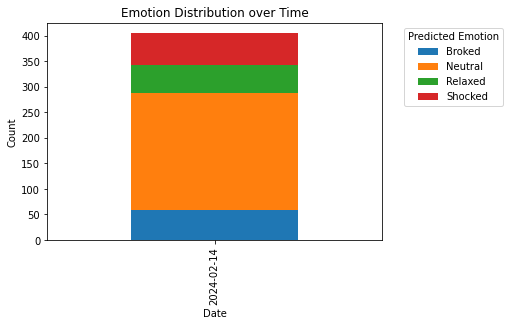

***********************************


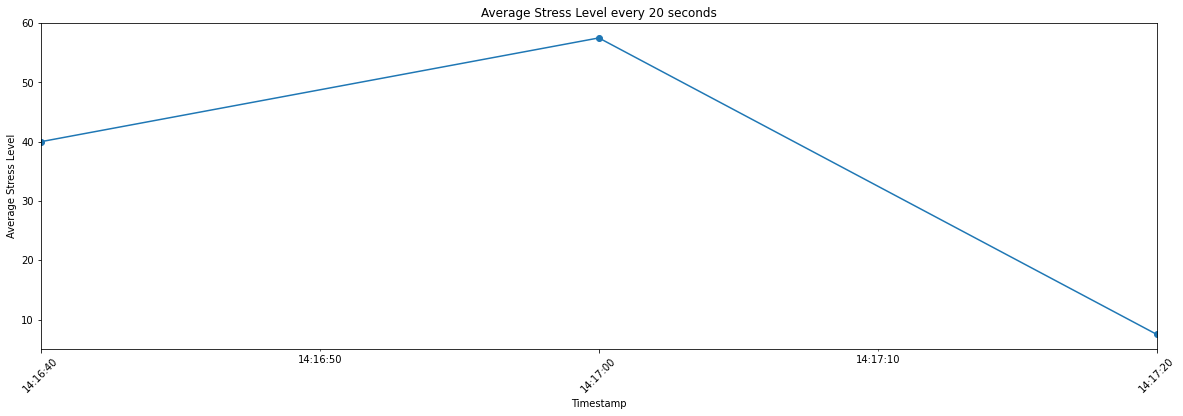

***********************************


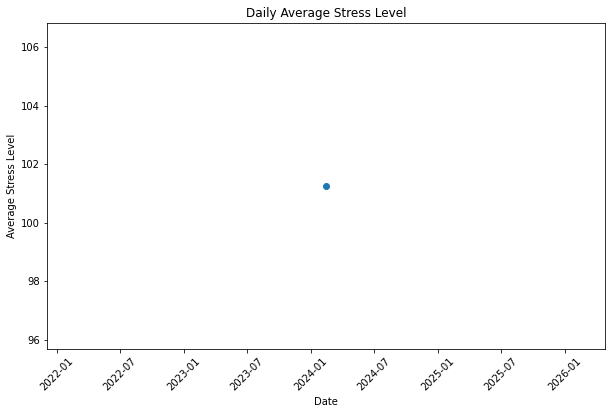

In [2]:
# Convert the 'Timestamp' column to datetime format and set the timezone to UTC
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s').dt.tz_localize('UTC')

# Convert the timezone to Indian Standard Time (IST)
df['Timestamp'] = df['Timestamp'].dt.tz_convert('Asia/Kolkata')

print("***********************************")
# Generate Emotion Trends over Time
plt.figure(figsize=(12, 8))
plt.plot(df['Timestamp'], df['PredictedEmotion'], marker='o')
plt.title('Emotion Trends over Time')
plt.xlabel('Timestamp (IST)')
plt.ylabel('Predicted Emotion')
plt.xticks(rotation=45)
plt.show()

print("***********************************")
# Additional Analysis: Emotion Distribution over Time
plt.figure(figsize=(12, 8))
df['Date'] = df['Timestamp'].dt.date
emotion_distribution_over_time = df.groupby(['Date', 'PredictedEmotion']).size().unstack().fillna(0)
emotion_distribution_over_time.plot(kind='bar', stacked=True)
plt.title('Emotion Distribution over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Predicted Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print("***********************************")
# Additional Analysis: Average Stress Level every 20 seconds
average_stress_level_per_20_seconds = df.groupby(df['Timestamp'].dt.floor('20S'))['PredictedEmotion'].value_counts().groupby(level=0).mean()
plt.figure(figsize=(20, 6))
average_stress_level_per_20_seconds.plot(kind='line', marker='o')
plt.title('Average Stress Level every 20 seconds')
plt.xlabel('Timestamp')
plt.ylabel('Average Stress Level')
plt.xticks(rotation=45)
plt.show()


print("***********************************")
# Additional Analysis: Daily Average Stress Level
daily_average_stress_level = df.groupby('Date')['PredictedEmotion'].value_counts().groupby('Date').mean()
plt.figure(figsize=(10, 6))
daily_average_stress_level.plot(kind='line', marker='o')
plt.title('Daily Average Stress Level')
plt.xlabel('Date')
plt.ylabel('Average Stress Level')
plt.xticks(rotation=45)
plt.show()


In [3]:
print(df['PredictedEmotion'].value_counts())
print("***********************************")
print(df['PredictedEmotion'].value_counts().mean())

Neutral    229
Shocked     62
Broked      59
Relaxed     55
Name: PredictedEmotion, dtype: int64
***********************************
101.25


In [4]:
print("***********************************")
# Calculate Average Stress Level
average_stress_level = df['PredictedEmotion'].value_counts().mean()
print("Based on our analysis of your emotional expressions, the average stress level is currently at ")
print(f'Average Stress Level: {average_stress_level:.2f}')

print("***********************************")
# Well-being Score Calculation (example scores, adjust as needed)
print("On a scale of 1-7, your well-being score is:")
emotion_scores = {'Relaxed': 7, 'Neutral': 6, 'Shocked': 5, 'Anxious': 4, 'Broked': 3, 'Bursted': 2, 'Irritated': 1}
df['EmotionScore'] = df['PredictedEmotion'].map(emotion_scores)
well_being_score = df['EmotionScore'].mean()
print(f'Well-being Score: {well_being_score:.2f}')

print("\nMeasures are as follows:")
print("'Relaxed': 7, 'Neutral': 6, 'Shocked': 5, 'Anxious': 4, 'Broked': 3, 'Bursted': 2, 'Irritated': 1")


***********************************
Based on our analysis of your emotional expressions, the average stress level is currently at 
Average Stress Level: 101.25
***********************************
On a scale of 1-7, your well-being score is:
Well-being Score: 5.55

Measures are as follows:
'Relaxed': 7, 'Neutral': 6, 'Shocked': 5, 'Anxious': 4, 'Broked': 3, 'Bursted': 2, 'Irritated': 1


***********************************


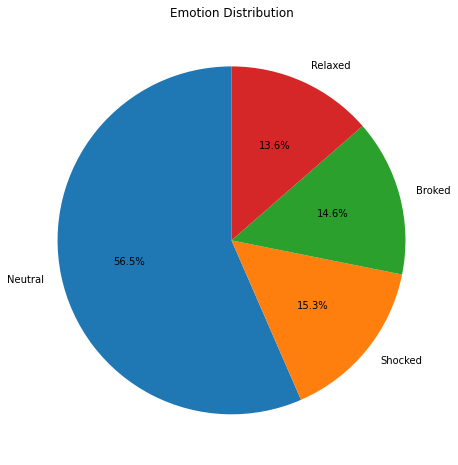

***********************************


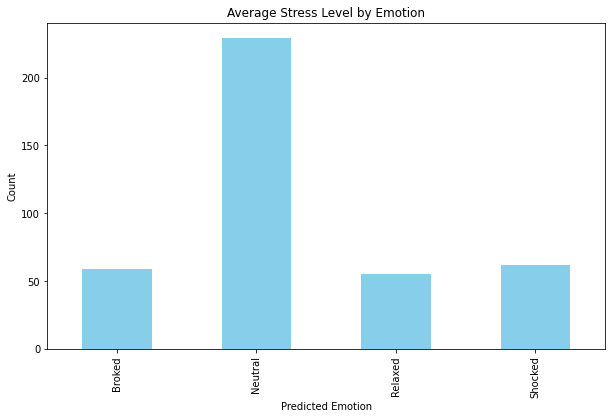

***********************************


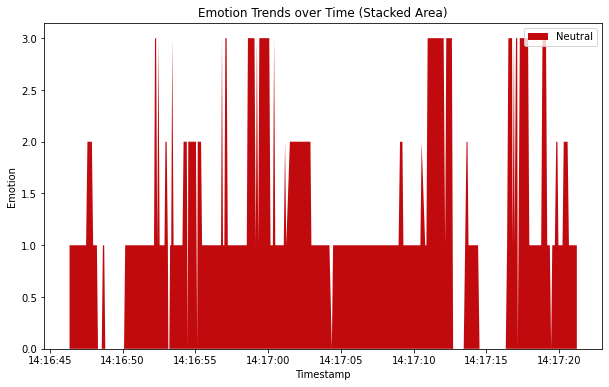

In [5]:
print("***********************************")
# Create an Emotion Distribution Chart
emotion_distribution = df['PredictedEmotion'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(emotion_distribution, labels=emotion_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Emotion Distribution')
plt.show()

print("***********************************")
# Average Stress Level Bar Chart
plt.figure(figsize=(10, 6))
df.groupby('PredictedEmotion')['Timestamp'].count().plot(kind='bar', color='skyblue')
plt.title('Average Stress Level by Emotion')
plt.xlabel('Predicted Emotion')
plt.ylabel('Count')
plt.show()

print("***********************************")
import random

# Generate random colors for each emotion
colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in df['PredictedEmotion'].unique()]

# Emotion Trends Stacked Area Chart
df['EmotionIndex'] = df['PredictedEmotion'].astype('category').cat.codes
df = df.sort_values(by='Timestamp')
plt.figure(figsize=(10, 6))
plt.stackplot(df['Timestamp'], df['EmotionIndex'], labels=df['PredictedEmotion'].unique(), colors=colors)
plt.legend(loc='upper right')
plt.title('Emotion Trends over Time (Stacked Area)')
plt.xlabel('Timestamp')
plt.ylabel('Emotion')
plt.show()


In [6]:
# Real data for recommendations
stress_recommendations = {
    'Bursted': ['Listen to calming music', 'Take a short break', 'Practice deep breathing',
                'Engage in a physical activity', 'Express your feelings through journaling'],
    'Irritated': ['Try a mindfulness exercise', 'Take a walk outside', 'Stretch for a few minutes',
                   'Practice progressive muscle relaxation', 'Identify and challenge negative thoughts'],
    'Anxious': ['Practice guided meditation', 'Write down your thoughts', 'Focus on positive affirmations',
                'Use visualization techniques', 'Establish a routine for better predictability'],
    'Relaxed': ['Continue your positive routine', 'Consider trying a new hobby', 'Reflect on your achievements',
                'Connect with loved ones', 'Enjoy a favorite book or movie'],
    'Neutral': ['Maintain your balance', 'Stay hydrated', 'Check-in with your emotions',
                'Take short breaks to refresh', 'Practice mindfulness throughout the day'],
    'Broked': ['Reach out to a friend', 'Engage in self-care activities', 'Reflect on self-improvement',
               'Seek professional support if needed', 'Create a gratitude list'],
    'Shocked': ['Pause and assess the situation', 'Take deep breaths', 'Seek support if needed',
                'Journal about your experience', 'Gradually reintroduce routine activities'],
}

# Dummy data for average stress level suggestions
average_stress_level_suggestions = [
    'Take a short break and stretch',
    'Practice mindfulness meditation',
    'Go for a walk in nature',
    'Listen to calming music',
    'Deep breathing exercises',
    'Engage in a hobby you enjoy',
    'Disconnect from digital devices for a while',
    'Spend time with loved ones',
    'Practice positive affirmations',
    'Consider seeking professional support if needed'
]


sudden_shocked = ['Ground yourself with deep breaths',
'Practice grounding exercises, like feeling your surroundings',
'Reach out to a supportive friend or family member',
'Consider seeking professional counseling or therapy',
'Create a calming environment around you',
'Engage in activities that bring comfort and relaxation',
'Reflect on positive experiences to shift focus']


# Display Motivational Messages and Recommendations for High Average Stress Level

print("***********************************")
# Example: Display a message if overall stress level is high
if average_stress_level > 3.0:
    print("High overall stress level observed. Take a moment to relax and practice mindfulness.")
    print("Here are some recommendations:")
    for recommendation in average_stress_level_suggestions:
        print(f"- {recommendation}")
        

print("***********************************")
# Example: Display a message if there is a sudden change in emotion
if df['PredictedEmotion'].nunique() > 1 and df['PredictedEmotion'].value_counts().idxmax() == 'Shocked':
    print("Sudden shift to 'Shocked' emotion. Check-in with yourself and address any concerns.")
    print("Here are some recommendations:")
    for recommendation in stress_recommendations['Shocked']:
        print(f"- {recommendation}")

***********************************
High overall stress level observed. Take a moment to relax and practice mindfulness.
Here are some recommendations:
- Take a short break and stretch
- Practice mindfulness meditation
- Go for a walk in nature
- Listen to calming music
- Deep breathing exercises
- Engage in a hobby you enjoy
- Disconnect from digital devices for a while
- Spend time with loved ones
- Practice positive affirmations
- Consider seeking professional support if needed
***********************************


In [7]:
# Dummy data for recommendations
stress_recommendations = {
    'Bursted': ['Listen to calming music', 'Take a short break', 'Practice deep breathing',
                'Engage in a physical activity', 'Express your feelings through journaling'],
    'Irritated': ['Try a mindfulness exercise', 'Take a walk outside', 'Stretch for a few minutes',
                   'Practice progressive muscle relaxation', 'Identify and challenge negative thoughts'],
    'Anxious': ['Practice guided meditation', 'Write down your thoughts', 'Focus on positive affirmations',
                'Use visualization techniques', 'Establish a routine for better predictability'],
    'Relaxed': ['Continue your positive routine', 'Consider trying a new hobby', 'Reflect on your achievements',
                'Connect with loved ones', 'Enjoy a favorite book or movie'],
    'Neutral': ['Maintain your balance', 'Stay hydrated', 'Check-in with your emotions',
                'Take short breaks to refresh', 'Practice mindfulness throughout the day'],
    'Broked': ['Reach out to a friend', 'Engage in self-care activities', 'Reflect on self-improvement',
               'Seek professional support if needed', 'Create a gratitude list'],
    'Shocked': ['Pause and assess the situation', 'Take deep breaths', 'Seek support if needed',
                'Journal about your experience', 'Gradually reintroduce routine activities'],
}

# Display Motivational Messages and Recommendations Based on Trends

print("***********************************")
# Example: Display recommendations if 'Shocked' emotion is frequent
shocked_count = emotion_distribution.get('Shocked', 0)
if shocked_count > 5:
    print(f"Frequent 'Shocked' expressions detected ({shocked_count} times). Consider taking a break and relaxing.")
    print("Here are some recommendations:")
    for recommendation in stress_recommendations['Shocked']:
        print(f"- {recommendation}")

        
print("***********************************")
# Example: Display a message if 'Anxious' emotion is consistently high
anxious_count = emotion_distribution.get('Anxious', 0)
if anxious_count > 3:
    print(f"Consistent high levels of 'Anxious' emotion ({anxious_count} times). Consider activities to reduce anxiety.")
    print("Here are some recommendations:")
    for recommendation in stress_recommendations['Anxious']:
        print(f"- {recommendation}")

        
print("***********************************")
# Example: Display a positive message if 'Relaxed' emotion is predominant
relaxed_count = emotion_distribution.get('Relaxed', 0)
if relaxed_count > 10:
    print(f"Frequent 'Relaxed' expressions detected ({relaxed_count} times). You're doing great! Keep up the positive vibes.")
    print("Here are some recommendations:")
    for recommendation in stress_recommendations['Relaxed']:
        print(f"- {recommendation}")

        
print("***********************************")
# Example: Display recommendations if 'Irritated' emotion is frequent
irritated_count = emotion_distribution.get('Irritated', 0)
if irritated_count > 5:
    print(f"Frequent 'Irritated' expressions detected ({irritated_count} times). Try these recommendations:")
    for recommendation in stress_recommendations['Irritated']:
        print(f"- {recommendation}")

        
print("***********************************")
# Example: Display recommendations if 'Bursted' emotion is frequent
bursted_count = emotion_distribution.get('Bursted', 0)
if bursted_count > 5:
    print(f"Frequent 'Bursted' expressions detected ({bursted_count} times). Consider these recommendations:")
    for recommendation in stress_recommendations['Bursted']:
        print(f"- {recommendation}")

        
print("***********************************")
# Example: Display recommendations if 'Neutral' emotion is frequent
neutral_count = emotion_distribution.get('Neutral', 0)
if neutral_count > 10:
    print(f"Frequent 'Neutral' expressions detected ({neutral_count} times). Here are some recommendations:")
    for recommendation in stress_recommendations['Neutral']:
        print(f"- {recommendation}")


***********************************
Frequent 'Shocked' expressions detected (62 times). Consider taking a break and relaxing.
Here are some recommendations:
- Pause and assess the situation
- Take deep breaths
- Seek support if needed
- Journal about your experience
- Gradually reintroduce routine activities
***********************************
***********************************
Frequent 'Relaxed' expressions detected (55 times). You're doing great! Keep up the positive vibes.
Here are some recommendations:
- Continue your positive routine
- Consider trying a new hobby
- Reflect on your achievements
- Connect with loved ones
- Enjoy a favorite book or movie
***********************************
***********************************
***********************************
Frequent 'Neutral' expressions detected (229 times). Here are some recommendations:
- Maintain your balance
- Stay hydrated
- Check-in with your emotions
- Take short breaks to refresh
- Practice mindfulness throughout the day